## Chapter 8: Evaluation metrics - Classification

Python and sklearn version used for this notebook

In [1]:
import sys

# Print the version of Python
print(sys.version)

3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


In [2]:
import sklearn

# Print the version of scikit-learn
sklearn_version = sklearn.__version__
sklearn_version


'1.2.2'

In [3]:
assert sys.version_info >= (3, 11) 

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.2.2")

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading the sheep dataset

In [5]:
import pandas as pd

# Reading the dataset using our custom function
df = pd.read_csv("sheep_data.csv")

# Take a look at the first 5 rows of the dataset
df.head()

,x_mean,x_std_dev,x_variance,x_icv,x_median,x_minimum,x_maximum,x_skewness,x_kurtosis,x_iqr,...,z_max_psd,z_spectral_entropy,z_peak_frequency,z_spectral_centroid,z_spectral_spread,z_spectral_skewness,z_spectral_kurtosis,z_spectral_flatness,z_spectral_rolloff,label
0,-0.127047,0.051875,0.002691,-2.449076,-0.1260,-0.256,0.008,-0.145693,0.097937,0.06675,...,2.419580,0.593014,4.1250,3.052060,1.484061,-0.534922,2.346818,0.582179,4.5000,grazing
1,-0.115156,0.045295,0.002052,-2.542368,-0.1190,-0.256,0.008,-0.157547,0.796587,0.06375,...,2.495610,0.697870,4.1250,2.841880,1.531736,-0.376181,2.095706,0.543022,4.3125,grazing
2,-0.110078,0.038005,0.001444,-2.896433,-0.1165,-0.171,0.008,0.588613,0.043011,0.06225,...,2.683044,0.836558,0.1875,2.586789,1.709652,-0.202790,1.673985,0.481731,4.3125,grazing
3,-0.111156,0.039253,0.001541,-2.831817,-0.1155,-0.175,0.008,0.485738,-0.082020,0.06275,...,2.883204,0.649190,0.1875,2.357693,1.773804,0.028470,1.512067,0.379781,4.3125,grazing
4,-0.108047,0.041168,0.001695,-2.624508,-0.1110,-0.175,0.008,0.385131,-0.410892,0.06225,...,3.376866,0.657325,0.1875,2.062371,1.770855,0.393420,1.640347,0.488464,4.3125,grazing


In [6]:
print("Shape:", df.shape)
print("NaN Values:", df.isnull().sum().sum(), "\n")

Shape: (64626, 83)
NaN Values: 0 



In [7]:
print(df.describe())

             x_mean     x_std_dev    x_variance         x_icv      x_median  \
count  64626.000000  64626.000000  6.462600e+04  64626.000000  64626.000000   
mean       0.216214      0.052556  1.014582e-02     53.730916      0.215428   
std        0.378714      0.085929  4.301334e-02    109.136817      0.379740   
min       -0.984359      0.000614  3.770000e-07   -338.293519     -0.989000   
25%       -0.074238      0.003238  1.050000e-05     -1.302709     -0.077500   
50%        0.336883      0.009609  9.230000e-05      8.853306      0.336000   
75%        0.483746      0.075182  5.652357e-03     91.993652      0.483000   
max        0.917594      1.157193  1.339095e+00   1137.662090      0.975500   

          x_minimum     x_maximum    x_skewness    x_kurtosis         x_iqr  \
count  64626.000000  64626.000000  64626.000000  64626.000000  64626.000000   
mean       0.097655      0.342900     -0.057744      1.088611      0.065558   
std        0.434949      0.422819      0.882009    

### Transorming class labels into integers

In [8]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, df.columns != 'label'].values
y = df['label'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
label_encoder.classes_

array(['grazing', 'resting', 'scratching', 'standing', 'walking'],
      dtype=object)

### Split the dataset 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y, random_state = 1)

### Using Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

def train_random_forest(X_train, y_train, X_test, n_estimators=100, random_state=1):
    """
    Trains a Random Forest classifier.

    Parameters:
    X_train, y_train: Training data and labels.
    n_estimators (int): The number of trees in the forest.
    random_state (int): Controls both the randomness of the bootstrapping of the samples and the sampling of the features.

    Returns:
    model: Trained Random Forest model.
    performance: Classification report and accuracy score.
    """

    # Initialize the Random Forest classifier
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_probam = model.predict_proba(X_test)

    return model, y_pred, y_pred_probam

model, y_pred, y_pred_probam = train_random_forest(X_train, y_train, X_test)


### Evaluation metrics for classification

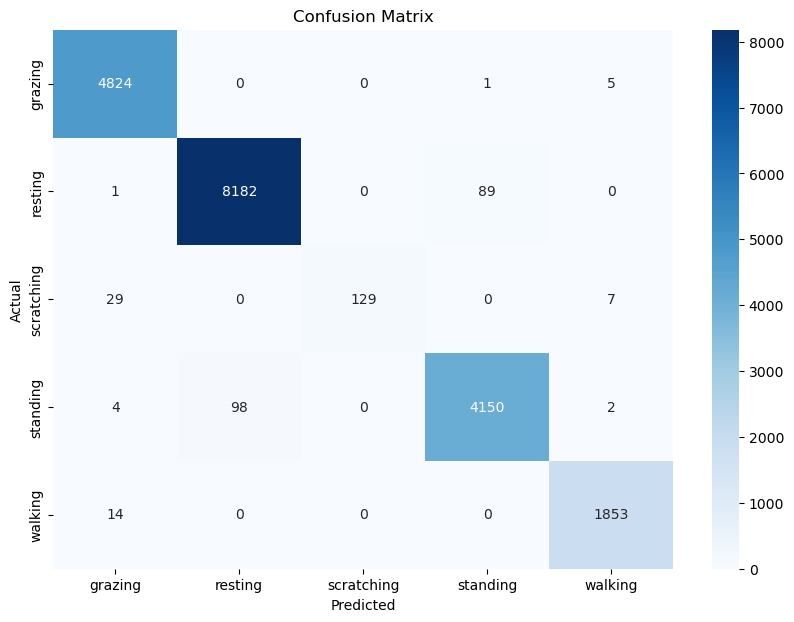

In [30]:
# Confusion matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with class names
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('cm.png', dpi=300)
plt.show()


In [31]:
# Accuracy 

from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are available
# y_test: actual truth labels
# y_pred: predicted labels by the classification model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.987


In [32]:
# Precision

from sklearn.metrics import precision_score

# Assuming y_test and y_pred are available
# y_test: actual truth labels
# y_pred: predicted labels by the classification model

# For binary classification
#precision_binary = precision_score(y_test, y_pred, pos_label='positive_class_name')
#print(f"Binary Classification Precision: {precision_binary:.2f}")

# For multi-class classification with macro-average
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"Multi-Class Precision (Macro-average): {precision_macro:.3f}")

# For multi-class classification with weighted-average
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"Multi-Class Precision (Weighted-average): {precision_weighted:.3f}")

Multi-Class Precision (Macro-average): 0.990
Multi-Class Precision (Weighted-average): 0.987


In [33]:
# Recall
from sklearn.metrics import recall_score

# Assuming y_test and y_pred are available
# y_test: actual truth labels
# y_pred: predicted labels by the classification model

# For binary classification
#recall_binary = recall_score(y_test, y_pred, pos_label='positive_class_name')
#print(f"Binary Classification Recall: {recall_binary:.2f}")

# For multi-class classification with macro-average
recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"Multi-Class Recall (Macro-average): {recall_macro:.3f}")

# For multi-class classification with weighted-average
recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"Multi-Class Recall (Weighted-average): {recall_weighted:.3f}")

Multi-Class Recall (Macro-average): 0.948
Multi-Class Recall (Weighted-average): 0.987


In [34]:
# F1-score
from sklearn.metrics import f1_score

# Assuming y_test and y_pred are available
# y_test: actual truth labels
# y_pred: predicted labels by the classification model

# For binary classification
#f1_binary = f1_score(y_test, y_pred, pos_label='positive_class_name')
#print(f"Binary Classification F1-Score: {f1_binary:.2f}")

# For multi-class classification with macro-average
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"Multi-Class F1-Score (Macro-average): {f1_macro:.3f}")

# For multi-class classification with weighted-average
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"Multi-Class F1-Score (Weighted-average): {f1_weighted:.3f}")

Multi-Class F1-Score (Macro-average): 0.966
Multi-Class F1-Score (Weighted-average): 0.987


In [42]:
# Classification report
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

     grazing       0.99      1.00      0.99      4830
     resting       0.99      0.99      0.99      8272
  scratching       1.00      0.78      0.88       165
    standing       0.98      0.98      0.98      4254
     walking       0.99      0.99      0.99      1867

    accuracy                           0.99     19388
   macro avg       0.99      0.95      0.97     19388
weighted avg       0.99      0.99      0.99     19388



In [35]:
from sklearn.metrics import log_loss

# Assuming y_test contains the actual labels and y_pred_proba contains the predicted probabilities
logloss_value = log_loss(y_test, y_pred_probam)
print(f"Log Loss: {logloss_value:.4f}")


Log Loss: 0.0668


In [36]:
# AUC-ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# We load the binary_data.csv
df = pd.read_csv("binary_data.csv")

# Split the dataset into features and target variable
X_b = df.drop('label', axis=1)
y_b = df['label']

# We split into train and test sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, 
                                                            test_size=0.7, 
                                                            stratify=y,
                                                            random_state=2)

# Fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_b, y_train_b)

# Predict probabilities
rf_probs = rf_model.predict_proba(X_test_b)

# Retain probabilities for the class of interest (positive class 'inactive')
rf_probs = rf_probs[:, 1]

# Calculate AUC scores for a classifier with no predictive power (baseline) and the trained Random Forest
baseline_auc = roc_auc_score(y_test_b, [0 for _ in range(len(y_test_b))])  
rf_auc = roc_auc_score(y_test_b, rf_probs)

# Display the AUC scores for the baseline and Random Forest classifiers
print('Baseline: ROC AUC=%.4f' % (baseline_auc))
print('Random Forest: ROC AUC=%.4f' % (rf_auc))



Baseline: ROC AUC=0.5000
Random Forest: ROC AUC=1.0000


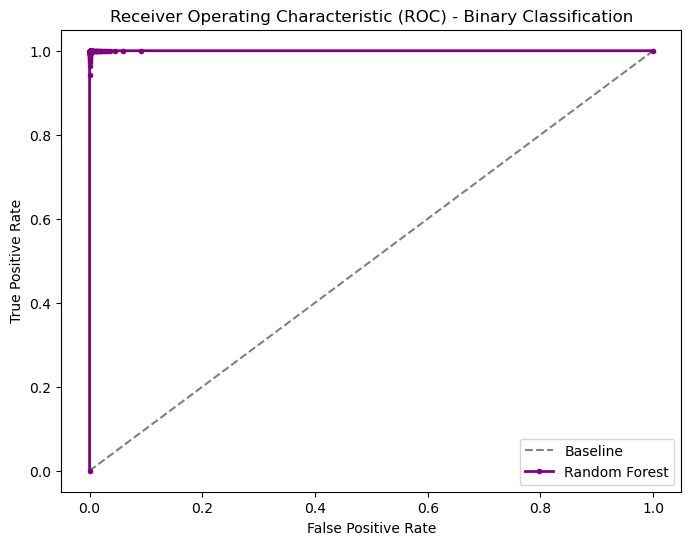

In [37]:
# Calculate ROC curves for the baseline and Random Forest classifiers
baseline_fpr, baseline_fpr_tpr, _ = roc_curve(y_test_b, [0 for _ in range(len(y_test_b))], pos_label='inactive')
rf_fpr, rf_tpr, _ = roc_curve(y_test_b, rf_probs, pos_label='inactive')

# Plot the ROC curve for the model
plt.figure(figsize=(8, 6))
plt.plot(baseline_fpr, baseline_fpr_tpr, linestyle='--', label='Baseline', color='gray')
plt.plot(rf_fpr, rf_tpr, marker='.', lw = 2, label='Random Forest', color='purple')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Binary Classification')
plt.legend()
plt.savefig('roc.png', dpi=300)
plt.show()

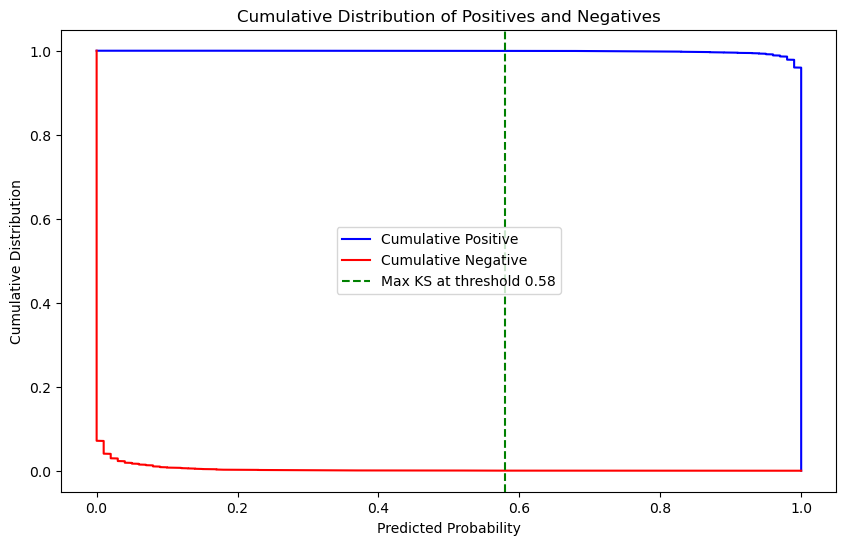

Maximum K-S Value: 0.9996 at threshold 0.5800


In [38]:
import numpy as np
# Convert labels to binary format
y_binary = np.where(y_b == 'inactive', 1, 0)

# Split the dataset into training and testing sets
X_traink, X_testk, y_traink, y_testk = train_test_split(X_b, y_binary, test_size=0.2, random_state=42)

# Fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_traink, y_traink)

# Predict probabilities for the test set
y_pred_proba = rf_model.predict_proba(X_testk)[:, 1]

# Sorting the Predictions and calculating the Cumulative Distributions
sorted_indices = np.argsort(y_pred_proba)[::-1]
sorted_y_test = y_testk[sorted_indices]
sorted_y_pred_proba = y_pred_proba[sorted_indices]

# Calculating the cumulative sum of positives and negatives
cumulative_positives = np.cumsum(sorted_y_test)
cumulative_negatives = np.cumsum(1 - sorted_y_test)

# Normalizing the cumulative sums to get cumulative distributions
cumulative_positives = cumulative_positives / max(cumulative_positives)
cumulative_negatives = cumulative_negatives / max(cumulative_negatives)

# Finding the maximum difference (K-S statistic)
ks_values = cumulative_positives - cumulative_negatives
max_ks_value = np.max(ks_values)
max_ks_index = np.argmax(ks_values)
max_ks_threshold = sorted_y_pred_proba[max_ks_index]

# Plotting the Cumulative Good and Bad
plt.figure(figsize=(10, 6))
plt.plot(sorted_y_pred_proba, cumulative_positives, label='Cumulative Positive', color='blue')
plt.plot(sorted_y_pred_proba, cumulative_negatives, label='Cumulative Negative', color='red')
plt.axvline(x=max_ks_threshold, color='green', linestyle='--', label=f'Max KS at threshold {max_ks_threshold:.2f}')
plt.title('Cumulative Distribution of Positives and Negatives')
plt.xlabel('Predicted Probability')
plt.ylabel('Cumulative Distribution')
plt.legend()
plt.savefig('ks-chart.png', dpi=300)
plt.show()

print(f'Maximum K-S Value: {max_ks_value:.4f} at threshold {max_ks_threshold:.4f}')
